<a href="https://colab.research.google.com/github/utpalmishra21/IBM-Applied-Data-Science-Capstone/blob/master/IBMDataScienceCapstonePart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEB SCRAPING

###IMPORT Libraries

In [ ]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

###GET Request

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


###PARSING

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')
data = soup.find_all('table')[0]
#data

###TEXT EXTRACTION

In [ ]:
PostalCode = []
Borough = []
Neighborhood = []

#data.find_all('tr')[0].find_all('th')[0].text.strip() #PostalCode
#data.find_all('tr')[0].find_all('th')[1].text.strip() #Borough
#data.find_all('tr')[0].find_all('th')[2].text.strip() #Neighborhood

for i in tqdm(range(1, len(data.find_all('tr')))):
  PostalCode.append(data.find_all('tr')[i].find_all('td')[0].text.strip())
  Borough.append(data.find_all('tr')[i].find_all('td')[1].text.strip())
  Neighborhood.append(data.find_all('tr')[i].find_all('td')[2].text.strip())

100%|██████████| 180/180 [00:00<00:00, 469.92it/s]


#DATAFRAME: Pre-Processing

In [ ]:
import pandas as pd

data = pd.DataFrame({'Postal Code':PostalCode,
                     'Borough':Borough,
                     'Neighborhood': Neighborhood})#, index = PostalCode)

In [ ]:
print(data.shape)
data.head()

(180, 3)


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [ ]:
data = data.sort_values(by = ['Postal Code'])
data.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn


###COURSERA Condition : Ignore cells with a borough that is Not assigned

In [ ]:
data = data[data['Borough'] != 'Not assigned']
print(data.shape)
data.head()

(103, 3)


,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae


###CO-ORDINATES CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Geospatial_Coordinates.csv'
coordinates = pd.read_csv(path)
coordinates = coordinates.sort_values(by = ['Postal Code'])
#coordinates.head()

In [ ]:
data = pd.merge(data, coordinates, on="Postal Code")
data.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


###DATA Description

In [ ]:
data.to_csv('Toronto.csv')
!cp Toronto.csv "drive/My Drive/Coursera/IBM"

In [ ]:
data.describe()

,Latitude,Longitude
count,103.000000,103.000000
mean,43.704608,-79.397153
std,0.052463,0.097146
min,43.602414,-79.615819
25%,43.660567,-79.464763
50%,43.696948,-79.388790
75%,43.745320,-79.340923
max,43.836125,-79.160497


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Latitude      103 non-null    float64
 4   Longitude     103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


###"NA" Value Check


In [ ]:
data.isna().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###"NULL" Value Check

In [ ]:
data.isnull().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###Value Count of FEATURES

In [ ]:
print(data['Postal Code'].value_counts(), "\n")
print(data['Borough'].value_counts(), "\n")
print(data['Neighborhood'].value_counts(), "\n")

M5E    1
M9B    1
M5X    1
M4S    1
M4Y    1
M3J    1
M4J    1
M6J    1
M6S    1
M6L    1
M3A    1
M2N    1
M4X    1
M7Y    1
M5V    1
M7R    1
M5N    1
M6A    1
M1S    1
M8Y    1
M9P    1
M5P    1
M4W    1
M4N    1
M2P    1
M3H    1
M1L    1
M1T    1
M1W    1
M1G    1
M4K    1
M9R    1
M4M    1
M1K    1
M8V    1
M3M    1
M6B    1
M8X    1
M1N    1
M4H    1
M9L    1
M6C    1
M4B    1
M1X    1
M4P    1
M9C    1
M3B    1
M4V    1
M4C    1
M5C    1
M6P    1
M8W    1
M1R    1
M4E    1
M5W    1
M1H    1
M5T    1
M5M    1
M2J    1
M6E    1
M3L    1
M5J    1
M1B    1
M3K    1
M6M    1
M2R    1
M1C    1
M6N    1
M2H    1
M5A    1
M4L    1
M6R    1
M4G    1
M9W    1
M5K    1
M2L    1
M5R    1
M1P    1
M7A    1
M6K    1
M6H    1
M9N    1
M4R    1
M5H    1
M1M    1
M8Z    1
M6G    1
M4A    1
M1V    1
M9M    1
M9A    1
M1E    1
M4T    1
M5S    1
M2M    1
M1J    1
M5G    1
M5L    1
M9V    1
M3N    1
M5B    1
M3C    1
M2K    1
Name: Postal Code, dtype: int64 

North York          24
Downtown Toronto

##Combining a row with the neighborhoods

In [ ]:
X = data.drop(['Latitude',	'Longitude'], axis = 1)
X.shape

(103, 3)

In [ ]:
X = X.groupby(by = 'Postal Code', as_index = False)
X.first()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [ ]:
print("DataFrame Shape: ", X.first().shape)

DataFrame Shape:  (103, 3)


In [ ]:
data.groupby('Borough').count()

,Postal Code,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


###VISUALIZATION

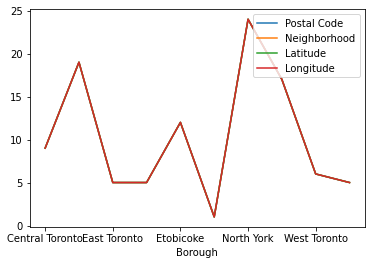

In [ ]:
data.groupby('Borough').count().plot()

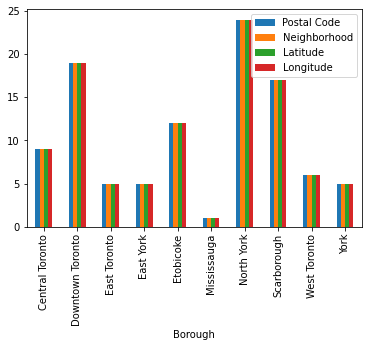

In [ ]:
data.groupby('Borough').count().plot.bar()

###NEIGHBORHOODS

In [ ]:
data.groupby('Neighborhood').count()

,Postal Code,Borough,Latitude,Longitude
Neighborhood,,,,
Agincourt,1,1,1,1
"Alderwood, Long Branch",1,1,1,1
"Bathurst Manor, Wilson Heights, Downsview North",1,1,1,1
Bayview Village,1,1,1,1
"Bedford Park, Lawrence Manor East",1,1,1,1
Berczy Park,1,1,1,1
"Birch Cliff, Cliffside West",1,1,1,1
"Brockton, Parkdale Village, Exhibition Place",1,1,1,1
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",1,1,1,1


In [ ]:
print('There are {} uniques Neighborhood.'.format(len(data['Neighborhood'].unique())))
print('There are {} uniques Borough.'.format(len(data['Borough'].unique())))

There are 99 uniques Neighborhood.
There are 10 uniques Borough.
